In [152]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
import ast, json
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# Important Notes

Data cleaning was done through Excel. For example, formatting original column 'date_of_travel' into year-month-date as well as removing spaces in columns names and adding under scores (' ' to ' _ ' )

In [153]:
cab_data = pd.read_csv('/Users/Francis/Desktop/DataSets/Cab_data.csv')
transaction_id = pd.read_csv('/Users/Francis/Desktop/DataSets/Transaction_ID.csv')
customer_id = pd.read_csv('/Users/Francis/Desktop/DataSets/Customer_ID.csv')
city = pd.read_csv('/Users/Francis/Desktop/DataSets/City.csv')
city = city.rename(columns={"City": "city","Population": "population","Users": "users"})
city.head()

,city,population,users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


# Notes

To Drop Columns in New DataFrame Use:

Df = df.drop(columns=['age'])

To create new csv:

new_df.reset_index(drop=True, inplace=True)

New_df.to_csv('name_of_new')

make barplot:
plt.figure(figsize=(14,6))
sns.barplot(x=yellow_monthly.index,y=yellow_monthly.values)
plt.title('Yellow Cab Total Travel by Month',fontsize = 12)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Values',fontsize = 12)
plt.show()

In [154]:
num_null = cab_data.isna().sum().sum()

print ('Count of Null Values: ' + str(num_null))

Count of Null Values: 0


In [155]:
yellow_count= cab_data.loc[cab_data['company'] == 'Yellow Cab']
count = len(yellow_count.index)
print('Total Number of Yellow Cab Rides: ' + str(count))


Total Number of Yellow Cab Rides: 274681


In [156]:
pink_count = cab_data.loc[cab_data['company'] == 'Pink Cab']
count = len(pink_count.index)
print('Total Number of Pink Cab Rides: ' + str(count))


Total Number of Pink Cab Rides: 84711


# Master data creation

In [157]:
left = cab_data.set_index(['transaction_id'])
right = transaction_id.set_index(['transaction_id'])
master_data = left.join(right)
master_data.head()

,date_of_travel,company,city,km_travelled,price_charged,cost_of_trip,customer_id,payment_Mode
transaction_id,,,,,,,,
10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


In [158]:
left = master_data.set_index([master_data.index,'customer_id'])
right = customer_id.set_index(['customer_id'])
master_data = left.join(right)
master_data.head()

,,date_of_travel,company,city,km_travelled,price_charged,cost_of_trip,payment_Mode,gender,age,income_usdpermonth
transaction_id,customer_id,,,,,,,,,,
10000011,29290,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Card,Male,28,10813
10000012,27703,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Card,Male,27,9237
10000013,28712,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Cash,Male,53,11242
10000014,28020,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Cash,Male,23,23327
10000015,27182,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,Card,Male,33,8536


In [159]:
left = master_data.set_index([master_data.index,'city'])
right = city.set_index(['city'])
master_data = left.join(right)
master_data.head()

,,,date_of_travel,company,km_travelled,price_charged,cost_of_trip,payment_Mode,gender,age,income_usdpermonth,population,users
transaction_id,customer_id,city,,,,,,,,,,,
10000011,29290,ATLANTA GA,2016-01-08,Pink Cab,30.45,370.95,313.635,Card,Male,28,10813,"814,885","24,701"
10000012,27703,ATLANTA GA,2016-01-06,Pink Cab,28.62,358.52,334.854,Card,Male,27,9237,"814,885","24,701"
10000013,28712,ATLANTA GA,2016-01-02,Pink Cab,9.04,125.20,97.632,Cash,Male,53,11242,"814,885","24,701"
10000014,28020,ATLANTA GA,2016-01-07,Pink Cab,33.17,377.40,351.602,Cash,Male,23,23327,"814,885","24,701"
10000015,27182,ATLANTA GA,2016-01-03,Pink Cab,8.73,114.62,97.776,Card,Male,33,8536,"814,885","24,701"


In [224]:
master_data.to_csv(r'Master_Data.csv')

# Analyzing Yellow Cab's Profit

In [161]:
cab_data['profit'] = cab_data['price_charged'] - cab_data['cost_of_trip']

In [162]:
yellow_cab = cab_data[cab_data['company'] == 'Yellow Cab']
pink_cab = cab_data[cab_data['company'] == 'Pink Cab']


In [163]:
top_profit_yellow = yellow_cab.sort_values(by ='profit', ascending=False)
top_profit_yellow['profit'] 

138644    1463.9660
138669    1445.2720
138766    1433.3420
138548    1424.1408
138732    1408.3440
            ...    
218508    -144.4464
164808    -144.7664
218709    -145.9468
231939    -160.7140
54991     -176.9308
Name: profit, Length: 274681, dtype: float64

In [164]:
total_profit_y = top_profit_yellow['profit'].sum()

print('Yellow Cab Total profit is: ' + str(total_profit_y))
print('Yellow Cab Average Profit Per Ride is: ' + str(total_profit_y / 274681))

Yellow Cab Total profit is: 44020373.1708
Yellow Cab Average Profit Per Ride is: 160.25998584103013


In [165]:
yellow_cab['Month'] = pd.DatetimeIndex(yellow_cab['date_of_travel']).month
yellow_cab['Year'] = pd.DatetimeIndex(yellow_cab['date_of_travel']).year
yellow_cab.head(1)

,transaction_id,date_of_travel,company,city,km_travelled,price_charged,cost_of_trip,profit,Month,Year
233,10000384,2016-01-02,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,877.0076,1,2016


In [166]:
yellow_monthly_profit = yellow_cab[yellow_cab.company=='Yellow Cab'].groupby(['Month']).profit.sum()
yellow_monthly_profit

Month
1     3.358436e+06
2     2.975979e+06
3     3.151215e+06
4     3.075543e+06
5     3.983544e+06
6     3.580338e+06
7     2.861562e+06
8     2.856271e+06
9     4.142382e+06
10    4.250512e+06
11    4.609321e+06
12    5.175271e+06
Name: profit, dtype: float64

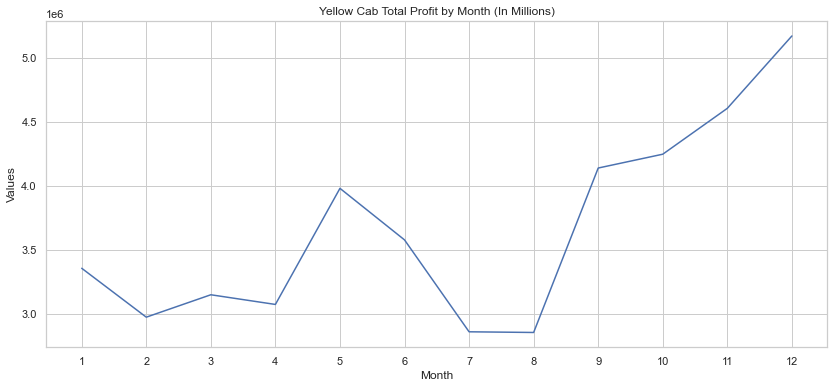

In [167]:
plt.figure(figsize=(14,6))
sns.lineplot(x=yellow_monthly_profit.index,y=yellow_monthly_profit.values)
plt.title('Yellow Cab Total Profit by Month (In Millions)',fontsize = 12)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Values',fontsize = 12)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])

plt.show()

In [168]:
yellow_yearly_profit = yellow_cab[yellow_cab.company=='Yellow Cab'].groupby(['Year']).profit.sum()
yellow_yearly_profit

Year
2016    1.392700e+07
2017    1.657598e+07
2018    1.351740e+07
Name: profit, dtype: float64

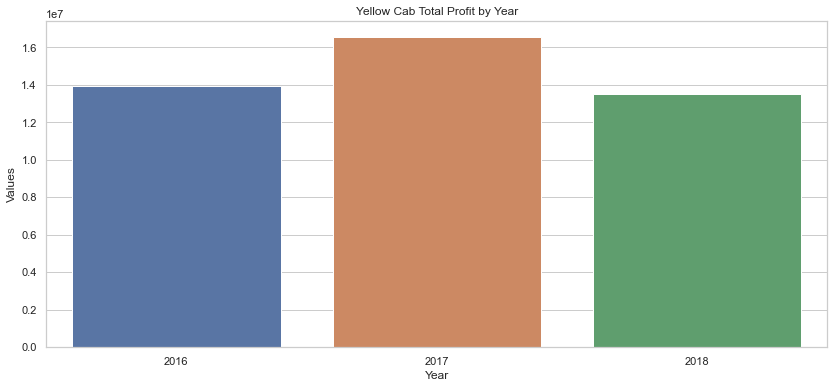

In [169]:
plt.figure(figsize=(14,6))
sns.barplot(x=yellow_yearly_profit.index,y=yellow_yearly_profit.values)
plt.title('Yellow Cab Total Profit by Year',fontsize = 12)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Values',fontsize = 12)

plt.show()

# Yellow Cab Profit Summary

Yellow cab had a total profit of 44,020,373.1708 with an average profit of 160.25998584103013 per ride. 
On average, Yellow cab has high spikes of profits during the holiday months (November-December) as well as a smaller spike during the summer months (May-July)
Yellow cab had its best profit in 2017 raking in $16,575,980.

# Analyzing Pink Cab's Profit

In [170]:
pink_cab = cab_data.loc[cab_data['company'] == 'Pink Cab']
top_profit_pink = pink_cab.sort_values(by ='profit', ascending=False)
top_profit_pink['profit']

63132     1119.480
183596    1056.110
183586    1039.080
63136      982.590
183576     971.170
            ...   
145520    -160.536
115200    -164.040
23384     -168.985
18954     -198.698
118348    -220.060
Name: profit, Length: 84711, dtype: float64

In [171]:
total_profit_p = top_profit_pink['profit'].sum()

print('Pink Cab Total profit is: ' + str(total_profit_p))
print('Pink Cab Average Profit Per Ride is: ' + str(total_profit_p / 84711))

Pink Cab Total profit is: 5307328.320999999
Pink Cab Average Profit Per Ride is: 62.65217410961975


In [172]:
pink_cab['Month'] = pd.DatetimeIndex(pink_cab['date_of_travel']).month
pink_cab['Year'] = pd.DatetimeIndex(pink_cab['date_of_travel']).year
pink_cab.head(1)

,transaction_id,date_of_travel,company,city,km_travelled,price_charged,cost_of_trip,profit,Month,Year
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,1,2016


In [173]:
total_profit = top_profit_pink['profit'].sum()

print('Pink Cab Total profit is: ' + str(total_profit))
print('Pink Cab Average Profit Per Ride is: ' + str(total_profit / 4148))

Pink Cab Total profit is: 5307328.320999999
Pink Cab Average Profit Per Ride is: 1279.4909163452262


In [174]:
pink_monthly_profit = pink_cab[pink_cab.company=='Pink Cab'].groupby(['Month']).profit.sum()
pink_monthly_profit

Month
1      388054.602
2      252041.309
3      299096.571
4      245818.095
5      168613.914
6      232715.233
7      301885.097
8      388251.300
9      494435.325
10     696437.071
11     810326.172
12    1029653.632
Name: profit, dtype: float64

In [175]:
pink_yearly_profit = pink_cab[pink_cab.company=='Pink Cab'].groupby(['Year']).profit.sum()
pink_yearly_profit

Year
2016    1713511.224
2017    2033654.908
2018    1560162.189
Name: profit, dtype: float64

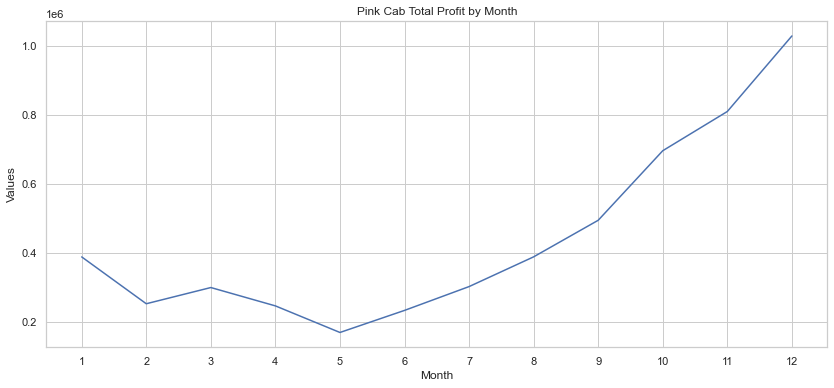

In [176]:
plt.figure(figsize=(14,6))
sns.lineplot(x=pink_monthly_profit.index,y=pink_monthly_profit.values)
plt.title('Pink Cab Total Profit by Month',fontsize = 12)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Values',fontsize = 12)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])

plt.show()

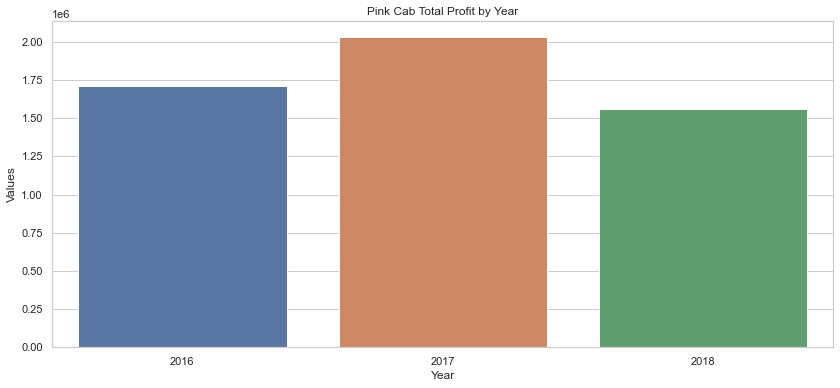

In [177]:
plt.figure(figsize=(14,6))
sns.barplot(x=pink_yearly_profit.index,y=pink_yearly_profit.values)
plt.title('Pink Cab Total Profit by Year',fontsize = 12)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Values',fontsize = 12)
plt.show()

# Pink Cab Profit Summary
Pink cab had a total profit of 5,307,328.320999999 with an average profit of 62.65217410961975 per ride. 
On average, Pink cab has consistent rise of profits from May-December, but has a very low profits in January when compared to December (641,599.03 less in January than in December)
Pink cab had its best profit in 2017 raking in $2,033,654.908.

# Comparing Yellow and Pink Cab's Yearly and Monthly Total Profit

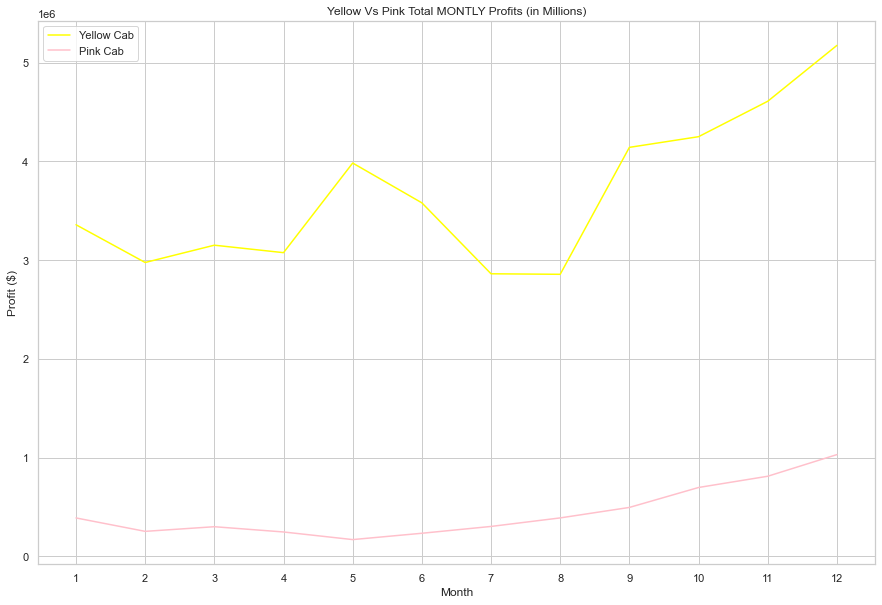

In [178]:
df = pd.DataFrame({"Yellow Cab":yellow_monthly_profit,"Pink Cab":pink_monthly_profit})
ax = df.plot(figsize=(15,10), color=["Yellow","Pink"], rot=0, title="Yellow Vs Pink Total MONTLY Profits (in Millions)")
ax.set_xlabel("Month")
ax.set_ylabel("Profit ($)")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])

plt.show()

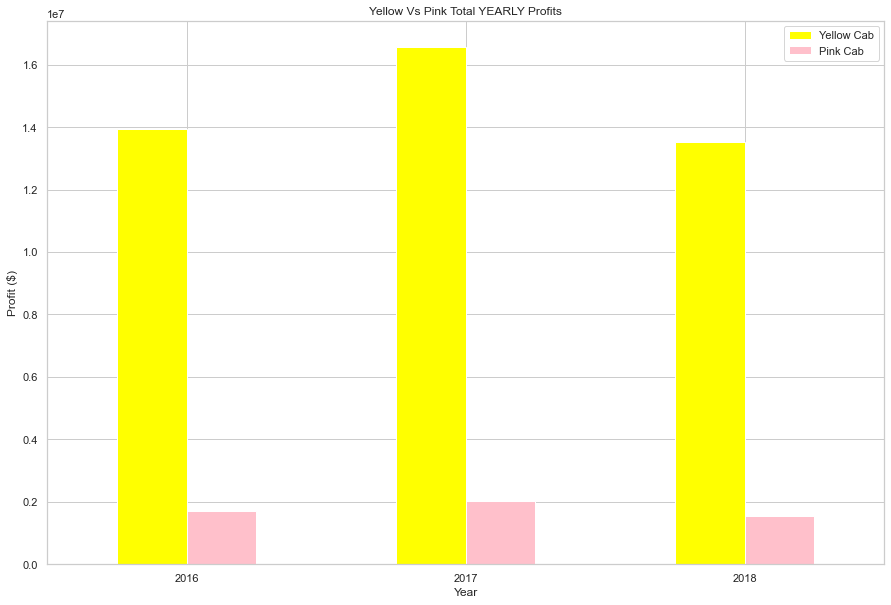

In [179]:
df = pd.DataFrame({"Yellow Cab":yellow_yearly_profit,"Pink Cab":pink_yearly_profit})
ax = df.plot.bar(figsize=(15,10), color=["Yellow","Pink"], rot=0, title="Yellow Vs Pink Total YEARLY Profits")
ax.set_xlabel("Year")
ax.set_ylabel("Profit ($)")

plt.show()

# Yellow and Pink Profit Distribution Comparison

In [180]:
pink_profit = pink_cab['profit'].describe()
yellow_profit = yellow_cab['profit'].describe()

In [181]:
df_profit = pd.DataFrame({'Pink_Cab': pink_profit.values,
                  'Yellow_Cab': yellow_profit.values}, index= ['Count', 'Mean', 'Std. Dev.', 'Min', '25%', '50%', '75%', 'Max'])
df_profit

,Pink_Cab,Yellow_Cab
Count,84711.000000,274681.000000
Mean,62.652174,160.259986
Std. Dev.,77.590378,171.823833
Min,-220.060000,-176.930800
25%,11.206000,37.180000
50%,41.500000,102.000000
75%,93.965000,228.670400
Max,1119.480000,1463.966000


# Pink versus Yellow Profits
Yellow Cab far surpasses Pink Cab in profits: 

Yellow Cab has an average of 160.26 per ride versus Pink's 62.65 (97.61 more) and 
Yellow Cab's total profit is 44,020,373.17 versus Pink's 5,307,328.32 (38,713,044.85 more)



# Monthly and Yearly Total Transactions Analysis

In [182]:
pink_monthly_transactions = pink_cab[pink_cab.company=='Pink Cab'].groupby(['Month']).transaction_id.count()
pink_monthly_transactions

Month
1      5057
2      3375
3      4223
4      4083
5      4960
6      5877
7      6590
8      7739
9      9658
10    10576
11    11005
12    11568
Name: transaction_id, dtype: int64

In [183]:
yellow_monthly_transactions = yellow_cab[yellow_cab.company=='Yellow Cab'].groupby(['Month']).transaction_id.count()
yellow_monthly_transactions

Month
1     18117
2     14932
3     17423
4     17351
5     18741
6     18836
7     21086
8     23584
9     27201
10    30276
11    31695
12    35439
Name: transaction_id, dtype: int64

In [184]:
yellow_yearly_transactions = yellow_cab[yellow_cab.company=='Yellow Cab'].groupby(['Year']).transaction_id.count()
yellow_yearly_transactions

Year
2016    82239
2017    98189
2018    94253
Name: transaction_id, dtype: int64

In [185]:
pink_yearly_transactions = pink_cab[pink_cab.company=='Pink Cab'].groupby(['Year']).transaction_id.count()
pink_yearly_transactions

Year
2016    25080
2017    30321
2018    29310
Name: transaction_id, dtype: int64

# Comparing Pink and Yellow Cab's Total Monthly and Yearly Charts

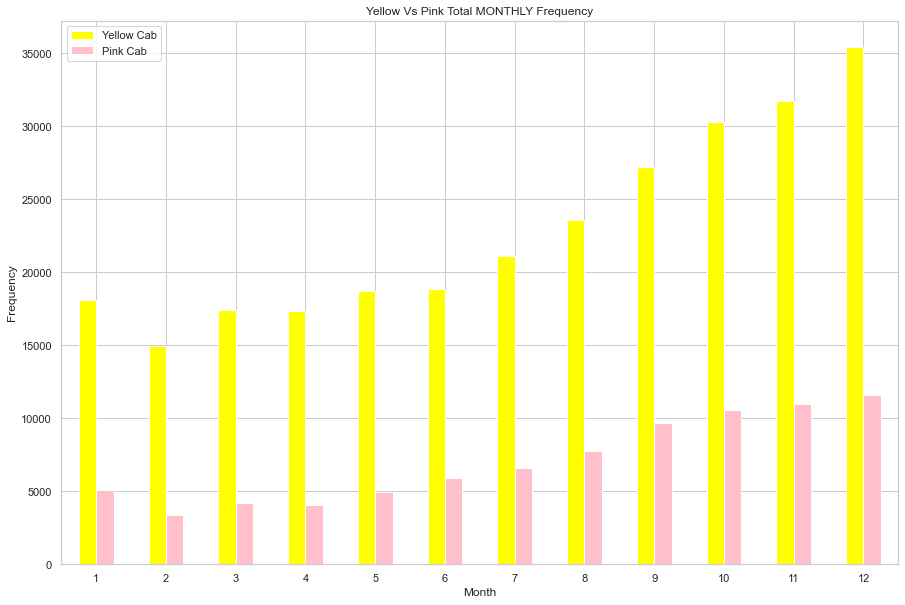

In [186]:
df = pd.DataFrame({"Yellow Cab":yellow_monthly_transactions,"Pink Cab":pink_monthly_transactions})
ax = df.plot.bar(figsize=(15,10), color=["Yellow","Pink"], rot=0, title="Yellow Vs Pink Total MONTHLY Frequency")
ax.set_xlabel("Month")
ax.set_ylabel("Frequency")


plt.show()

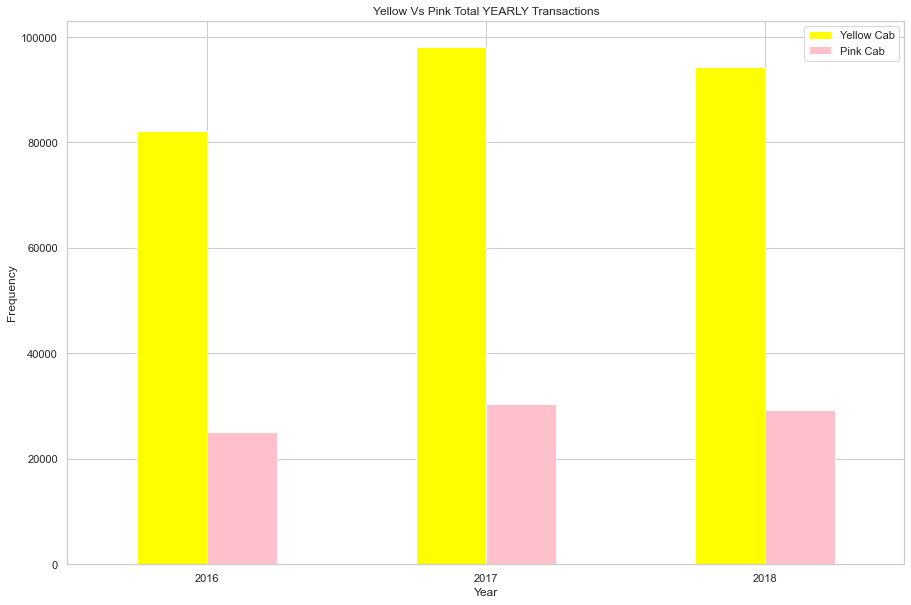

In [187]:
df = pd.DataFrame({"Yellow Cab":yellow_yearly_transactions,"Pink Cab":pink_yearly_transactions})
ax = df.plot.bar(figsize=(15,10), color=["Yellow","Pink"], rot=0, title="Yellow Vs Pink Total YEARLY Transactions")
ax.set_xlabel("Year")
ax.set_ylabel("Frequency")

plt.show()

# Yellow versus Pink Total Transactions/Rides
Seen in above charts, Yellow Cab more than doubles Pink Cab's total transactions in terms of average monthly as well as total years.

# Analyzing Yellow and Pink KM Travelled

In [188]:
yellow_yearly_km = yellow_cab[yellow_cab.company=='Yellow Cab'].groupby(['Year']).km_travelled.sum()
yellow_yearly_km

Year
2016    1859978.21
2017    2214879.02
2018    2124560.24
Name: km_travelled, dtype: float64

In [189]:
yellow_monthly_km = yellow_cab[yellow_cab.company=='Yellow Cab'].groupby(['Month']).km_travelled.sum()
yellow_monthly_km

Month
1     412047.25
2     336179.66
3     393560.89
4     391822.07
5     421559.05
6     424771.06
7     478426.74
8     531992.91
9     611532.39
10    681823.67
11    715805.03
12    799896.75
Name: km_travelled, dtype: float64

In [190]:
pink_yearly_km = pink_cab[pink_cab.company=='Pink Cab'].groupby(['Year']).km_travelled.sum()
pink_yearly_km

Year
2016    563509.67
2017    685823.52
2018    661739.92
Name: km_travelled, dtype: float64

In [191]:
pink_monthly_km = pink_cab[pink_cab.company=='Pink Cab'].groupby(['Month']).km_travelled.sum()
pink_monthly_km

Month
1     113740.49
2      76210.83
3      97080.92
4      91880.15
5     111492.84
6     133577.95
7     148305.55
8     174195.47
9     217291.43
10    237926.39
11    247898.67
12    261472.42
Name: km_travelled, dtype: float64

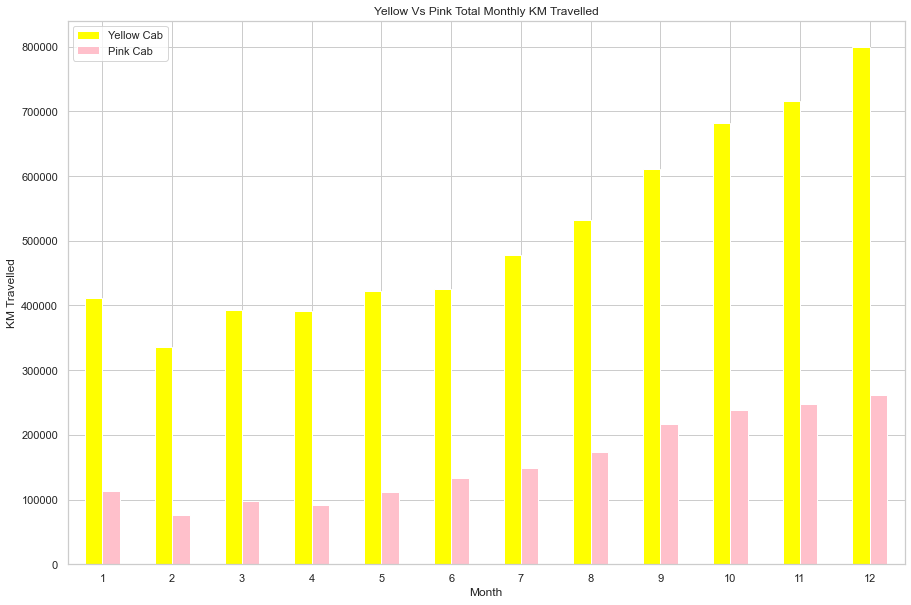

In [192]:
df = pd.DataFrame({"Yellow Cab":yellow_monthly_km,"Pink Cab":pink_monthly_km})
ax = df.plot.bar(figsize=(15,10), color=["Yellow","Pink"], rot=0, title="Yellow Vs Pink Total Monthly KM Travelled")
ax.set_xlabel("Month")
ax.set_ylabel("KM Travelled")


plt.show()

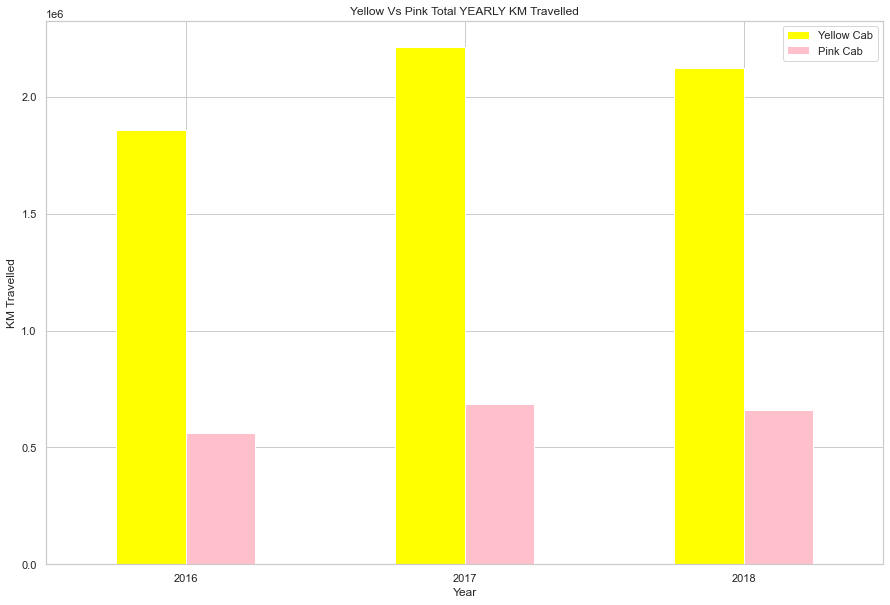

In [193]:
df = pd.DataFrame({"Yellow Cab":yellow_yearly_km,"Pink Cab":pink_yearly_km})
ax = df.plot.bar(figsize=(15,10), color=["Yellow","Pink"], rot=0, title="Yellow Vs Pink Total YEARLY KM Travelled")
ax.set_xlabel("Year")
ax.set_ylabel("KM Travelled")

plt.show()

In [194]:
pink_km_travelled = pink_cab['km_travelled'].describe()
yellow_km_travelled = yellow_cab['km_travelled'].describe()


In [195]:
df_profit = pd.DataFrame({'Pink_Cab': pink_km_travelled.values,
                  'Yellow_Cab': yellow_km_travelled.values}, index= ['Total', 'Mean', 'Std. Dev.', 'Min', '25%', '50%', '75%', 'Max'])
df_profit

,Pink_Cab,Yellow_Cab
Total,84711.000000,274681.000000
Mean,22.559917,22.569517
Std. Dev.,12.231092,12.234298
Min,1.900000,1.900000
25%,12.000000,11.990000
50%,22.440000,22.440000
75%,32.960000,32.960000
Max,48.000000,48.000000


# Yellow versus Pink KM Travelled
Here, we see that Yellow Cab far surpasses Pink cab's all around KM travelled, yet both Pink and Yellow Cab average around the same amount of KM travelled per ride as well as the same minimum and maximum KM travelled. However, we find that Yellow does a better job of accumulating more transactions and profits than Pink all whilst travelling around the same amount of distance

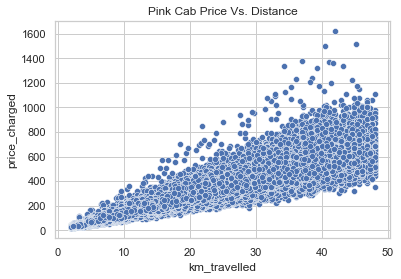

In [196]:
sns.scatterplot(data=pink_cab, x="km_travelled", y="price_charged")
ax = plt.gca()
ax.set_title("Pink Cab Price Vs. Distance")
plt.show()

In [197]:
pink_corr = pink_cab['km_travelled'].corr(pink_cab['price_charged'])
print('The correlation between Pink Cab KM travelled versus price charged is: ' + str(pink_corr))

The correlation between Pink Cab KM travelled versus price charged is: 0.9277652782594851


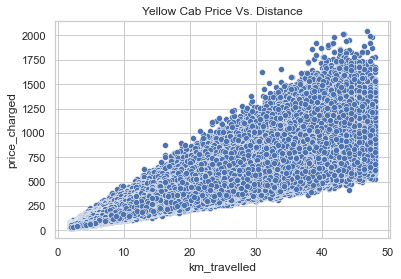

In [198]:
sns.scatterplot(data=yellow_cab, x="km_travelled", y="price_charged")
ax = plt.gca()
ax.set_title("Yellow Cab Price Vs. Distance")
plt.show()

In [199]:
yellow_corr = yellow_cab['km_travelled'].corr(yellow_cab['price_charged'])
print('The correlation between Yellow Cab KM travelled versus price charged is: ' + str(yellow_corr))

The correlation between Yellow Cab KM travelled versus price charged is: 0.859708629447849


# Yellow versus Pink Price based on Distance
Both companies maintain a positive correlation of price versus distance. The higher the distance the higher the price. Pink Cab's correlation is better at .93 whilst Yellow's is .86. Yellow could do a better job of pricing their rides by charging more for higher distance and vice versa

# Finding Outliers in Price Charged for both Yellow and Pink

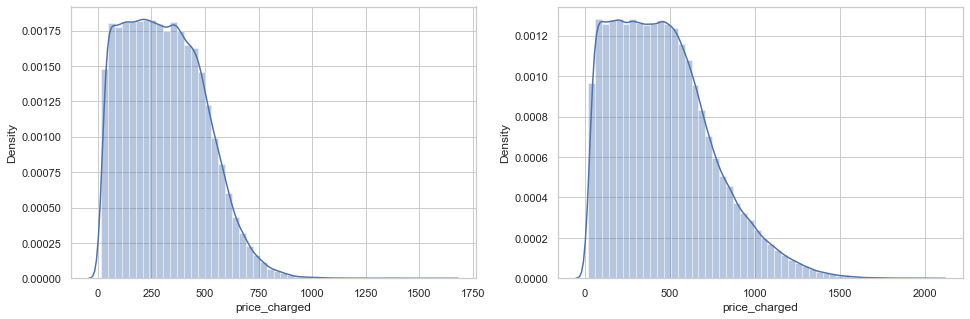

In [200]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(pink_cab['price_charged'])
plt.subplot(1,2,2)
sns.distplot(yellow_cab['price_charged'])
plt.show()

We can see that the data for both Pink and Yellow cab's price charged is skewed right, therefore I will take an IQR based outlier detection

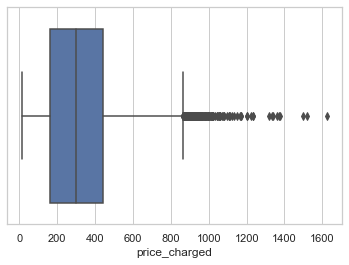

In [201]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=pink_cab["price_charged"])

In [202]:
pq75, pq25 = np.percentile(pink_cab['price_charged'], [75 ,25])
piqr = pq75 - pq25

In [203]:
ppercentile25 = pink_cab['price_charged'].quantile(0.25)
ppercentile75 = pink_cab['price_charged'].quantile(0.75)

In [204]:
upper_limit_pink = ppercentile75 + 1.5 * piqr
lower_limit_pink = ppercentile25 - 1.5 * piqr

upper_limit_pink

863.8074999999999

In [205]:
pink_outliers_upper=pink_cab[pink_cab['price_charged'] > upper_limit_pink]
pink_outliers_lower=pink_cab[pink_cab['price_charged'] < lower_limit_pink]
pul = pink_outliers_upper['price_charged'].count()
print('There are ' + str(pul) + ' outliers in Pink Cabs price charged')

There are 237 outliers in Pink Cabs price charged


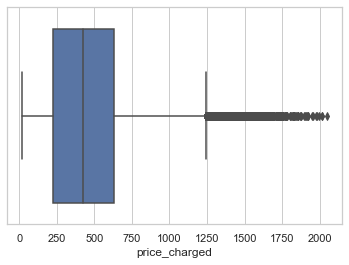

In [206]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=yellow_cab["price_charged"])

In [207]:
yq75, yq25 = np.percentile(yellow_cab['price_charged'], [75 ,25])
yiqr = yq75 - yq25

In [208]:
ypercentile25 = yellow_cab['price_charged'].quantile(0.25)
ypercentile75 = yellow_cab['price_charged'].quantile(0.75)

In [209]:
upper_limit_yellow = ypercentile75 + 1.5 * yiqr
lower_limit_yellow = ypercentile25 - 1.5 * yiqr

In [210]:
upper_limit_yellow

1244.6799999999998

In [211]:
yellow_outliers_upper=yellow_cab[yellow_cab['price_charged'] > upper_limit_yellow]
yellow_outliers_lower=yellow_cab[yellow_cab['price_charged'] < lower_limit_yellow]
yul = yellow_outliers_upper['price_charged'].count()
print('There are ' + str(yul) + ' outliers in Yellow Cabs price charged')

There are 3240 outliers in Yellow Cabs price charged


# Yellow Vs. Pink Cab City User Percentages

In [212]:
yellow_city = yellow_cab.groupby('city').transaction_id.count()
yellow_city

city
ATLANTA GA         5795
AUSTIN TX          3028
BOSTON MA         24506
CHICAGO IL        47264
DALLAS TX          5637
DENVER CO          2431
LOS ANGELES CA    28168
MIAMI FL           4452
NASHVILLE TN       1169
NEW YORK NY       85918
ORANGE COUNTY      2469
PHOENIX AZ         1200
PITTSBURGH PA       631
SACRAMENTO CA      1033
SAN DIEGO CA       9816
SEATTLE WA         5265
SILICON VALLEY     4722
TUCSON AZ          1132
WASHINGTON DC     40045
Name: transaction_id, dtype: int64

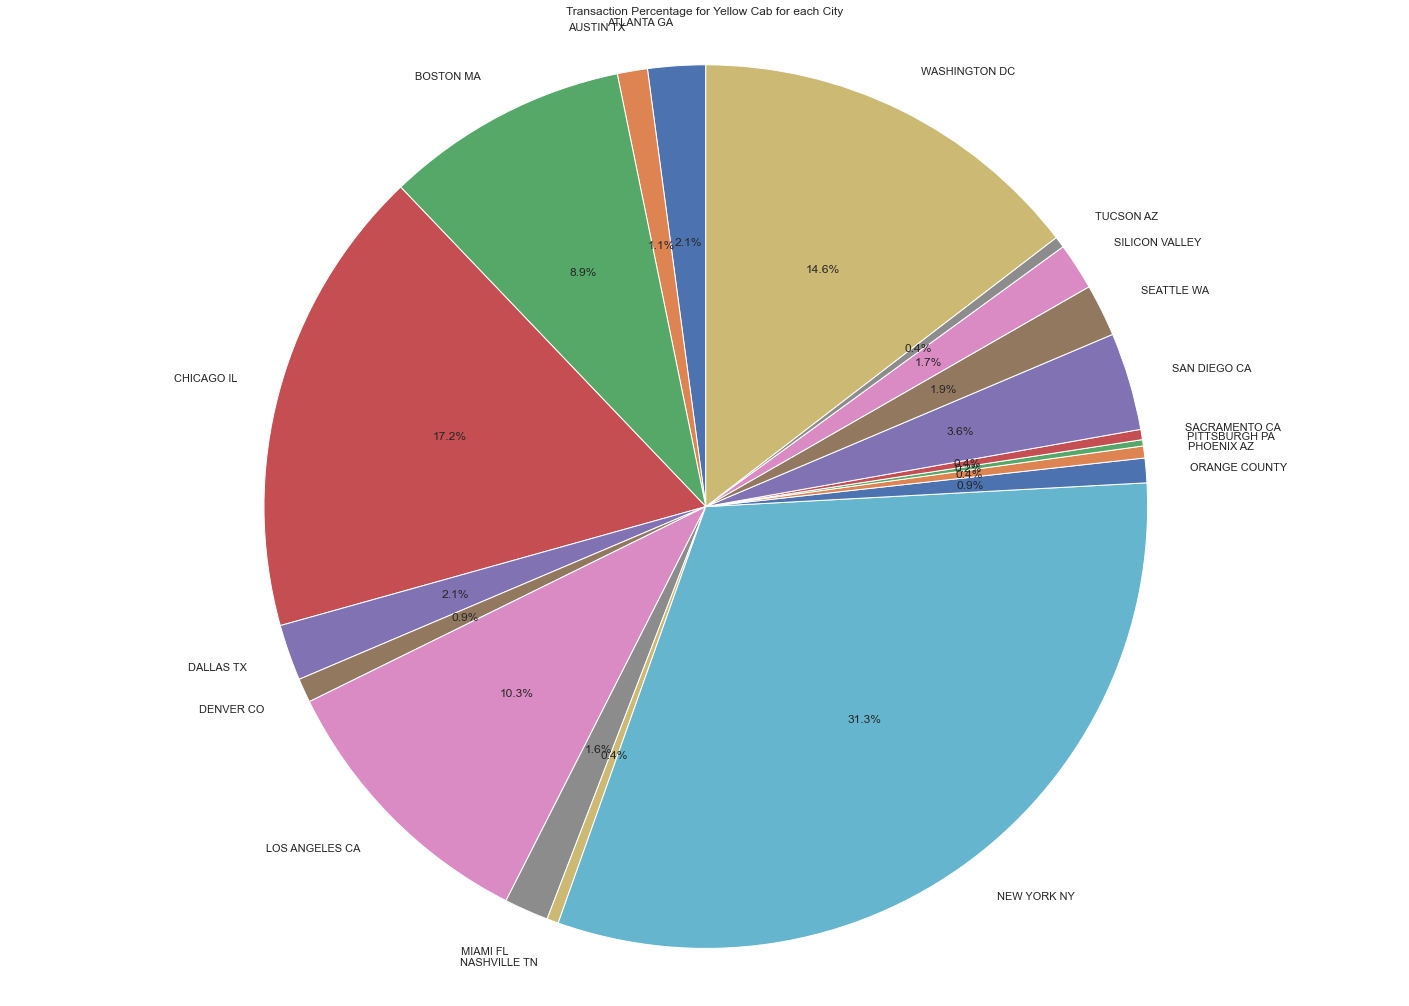

In [213]:
labs = yellow_city.index
vals = yellow_city.values
figp, axp = plt.subplots(figsize=(25,18))
axp.pie(vals , labels=labs, autopct='%1.1f%%', startangle=90,)
axp.axis('equal')

plt.title('Transaction Percentage for Yellow Cab for each City')
plt.show()

The highest percentage of Yellow cab's customer base is from New York (31.3%)

In [214]:
pink_city = pink_cab.groupby('city').transaction_id.count()
pink_city

city
ATLANTA GA         1762
AUSTIN TX          1868
BOSTON MA          5186
CHICAGO IL         9361
DALLAS TX          1380
DENVER CO          1394
LOS ANGELES CA    19865
MIAMI FL           2002
NASHVILLE TN       1841
NEW YORK NY       13967
ORANGE COUNTY      1513
PHOENIX AZ          864
PITTSBURGH PA       682
SACRAMENTO CA      1334
SAN DIEGO CA      10672
SEATTLE WA         2732
SILICON VALLEY     3797
TUCSON AZ           799
WASHINGTON DC      3692
Name: transaction_id, dtype: int64

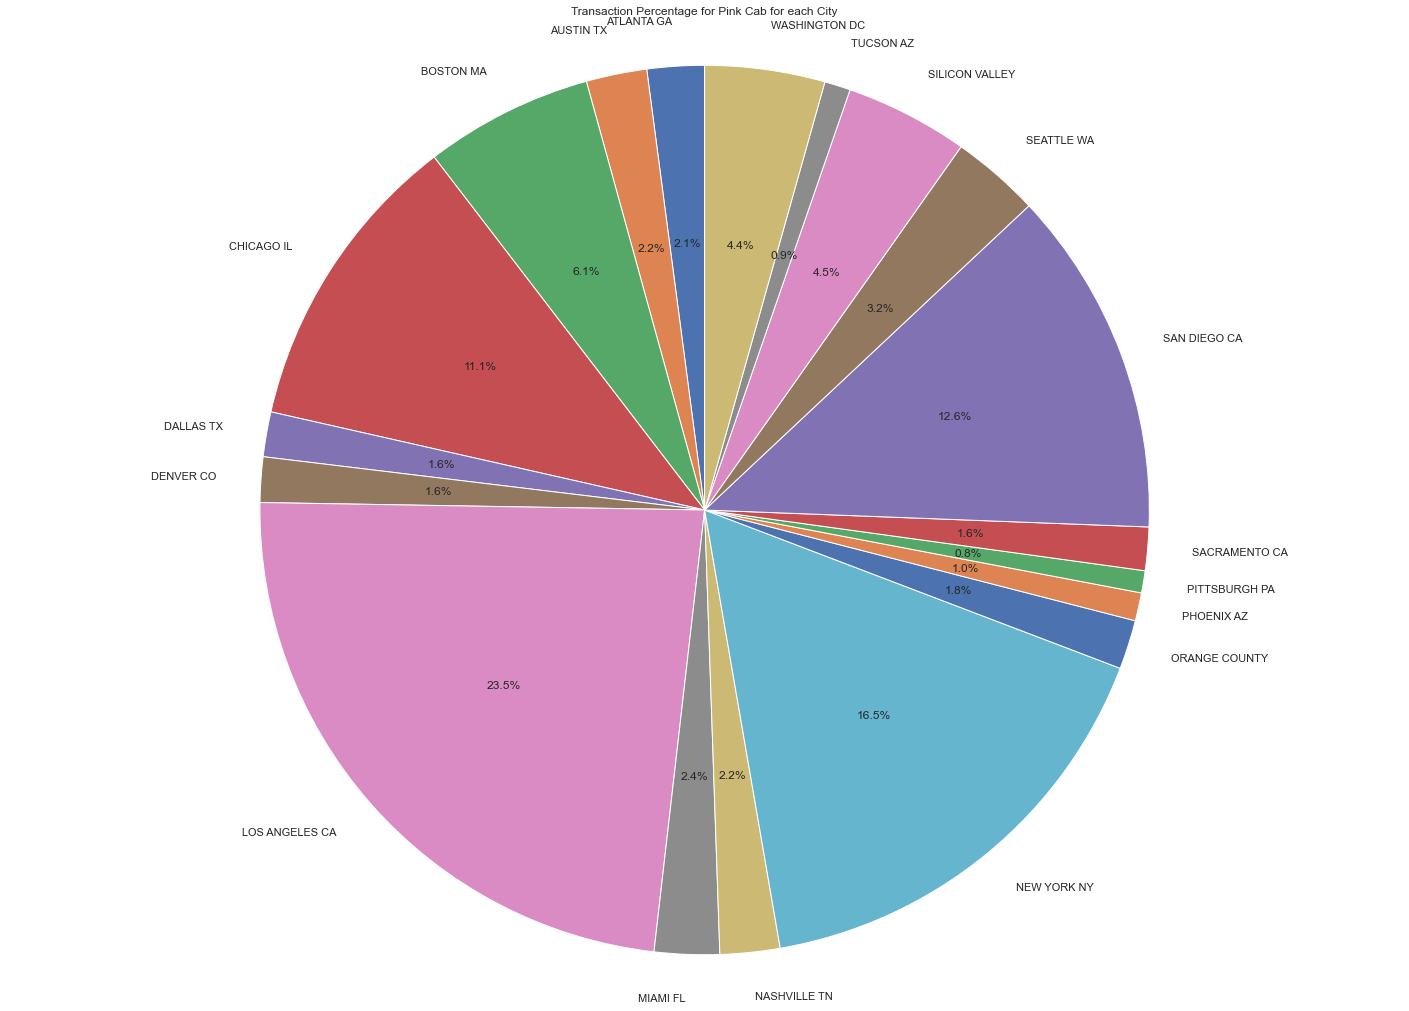

In [215]:
labs = pink_city.index
vals = pink_city.values
figp, axp = plt.subplots(figsize=(25,18))
axp.pie(vals , labels=labs, autopct='%1.1f%%', startangle=90,)
axp.axis('equal')

plt.title('Transaction Percentage for Pink Cab for each City')
plt.show()

The highest percentage of Pink cab's customer base is from Los Angeles (23.5%)

# Gender Analysis for Yellow and Pink

In [216]:
yellow_master = master_data[master_data['company'] == 'Yellow Cab']
pink_master = master_data[master_data['company'] == 'Pink Cab']
pink_master

,,,date_of_travel,company,km_travelled,price_charged,cost_of_trip,payment_Mode,gender,age,income_usdpermonth,population,users
transaction_id,customer_id,city,,,,,,,,,,,
10000011,29290,ATLANTA GA,2016-01-08,Pink Cab,30.45,370.95,313.635,Card,Male,28,10813,"814,885","24,701"
10000012,27703,ATLANTA GA,2016-01-06,Pink Cab,28.62,358.52,334.854,Card,Male,27,9237,"814,885","24,701"
10000013,28712,ATLANTA GA,2016-01-02,Pink Cab,9.04,125.20,97.632,Cash,Male,53,11242,"814,885","24,701"
10000014,28020,ATLANTA GA,2016-01-07,Pink Cab,33.17,377.40,351.602,Cash,Male,23,23327,"814,885","24,701"
10000015,27182,ATLANTA GA,2016-01-03,Pink Cab,8.73,114.62,97.776,Card,Male,33,8536,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10437610,51142,WASHINGTON DC,2018-01-06,Pink Cab,13.56,184.19,135.600,Card,Female,40,3122,"418,859","127,001"
10437611,52754,WASHINGTON DC,2018-12-31,Pink Cab,29.68,388.08,302.736,Card,Female,29,19676,"418,859","127,001"
10437612,53039,WASHINGTON DC,2018-01-07,Pink Cab,28.50,369.04,310.650,Card,Male,37,22765,"418,859","127,001"


In [217]:
y = yellow_master.groupby(['gender']).count().reset_index()
yellow_gender = y[['gender', 'users']]
yellow_gender

,gender,users
0,Female,116000
1,Male,158681


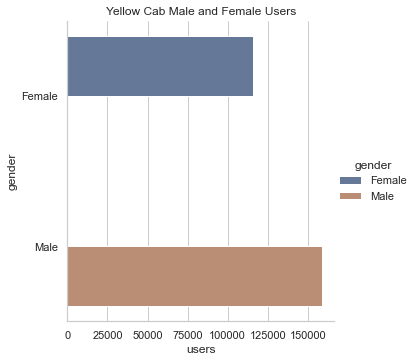

In [218]:
y_gender_plot = sns.catplot(x='users', y="gender", hue="gender",
                data=yellow_gender, saturation=.5, dodge=True, ci=None, kind="bar")
ax = plt.gca()
ax.set_title("Yellow Cab Male and Female Users")
plt.show()

In [219]:
p = pink_master.groupby(['gender']).count().reset_index()
pink_gender = p[['gender', 'users']]
pink_gender

,gender,users
0,Female,37480
1,Male,47231


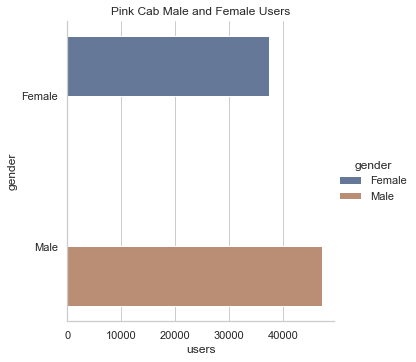

In [220]:
p_gender_plot = sns.catplot(x='users', y="gender", hue="gender",
                data=pink_gender, saturation=.5, dodge=True, ci=None, kind="bar")
ax = plt.gca()
ax.set_title("Pink Cab Male and Female Users")
plt.show()

# Hypothesis Testing
Does profit/margins change depending on gender of customer?

In [221]:
master_data['profit'] = master_data['price_charged'] - master_data['cost_of_trip']
master_data.head()

,,,date_of_travel,company,km_travelled,price_charged,cost_of_trip,payment_Mode,gender,age,income_usdpermonth,population,users,profit
transaction_id,customer_id,city,,,,,,,,,,,,
10000011,29290,ATLANTA GA,2016-01-08,Pink Cab,30.45,370.95,313.635,Card,Male,28,10813,"814,885","24,701",57.315
10000012,27703,ATLANTA GA,2016-01-06,Pink Cab,28.62,358.52,334.854,Card,Male,27,9237,"814,885","24,701",23.666
10000013,28712,ATLANTA GA,2016-01-02,Pink Cab,9.04,125.20,97.632,Cash,Male,53,11242,"814,885","24,701",27.568
10000014,28020,ATLANTA GA,2016-01-07,Pink Cab,33.17,377.40,351.602,Cash,Male,23,23327,"814,885","24,701",25.798
10000015,27182,ATLANTA GA,2016-01-03,Pink Cab,8.73,114.62,97.776,Card,Male,33,8536,"814,885","24,701",16.844


# Yellow Cab Hypothesis Test
Null Hypothesis = There is no statistical relationship between Gender and Profit

In [222]:
a = master_data[(master_data.gender=='Male')&(master_data.company=='Yellow Cab')].groupby('transaction_id').profit.mean()
b = master_data[(master_data.gender=='Female')&(master_data.company=='Yellow Cab')].groupby('transaction_id').profit.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We accept null hypothesis that there is NO statistical difference')
    
print('P value is ', p_value)

158681 116000
We accept alternate hypothesis that there is a statistical difference
P value is  6.060473042494144e-25


# Rejecting the null hypothesis, Yellow Cab appears to show a statistical difference between amount of profit made versus gender

# Pink Cab Hypothesis Test
Null Hypothesis = There is no statistical relationship between Gender and Profit

In [223]:
a = master_data[(master_data.gender=='Male')&(master_data.company=='Pink Cab')].groupby('transaction_id').profit.mean()
b = master_data[(master_data.gender=='Female')&(master_data.company=='Pink Cab')].groupby('transaction_id').profit.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We accept null hypothesis that there is NO statistical difference')
    
print('P value is ', p_value)

47231 37480
We accept null hypothesis that there is NO statistical difference
P value is  0.11515305900425798


# Accepting the null hypothesis, Pink Cab appears to show NO statistical difference between amount of profit made versus gender